In [1]:
%matplotlib inline
import pandas as pd
#from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau, History, ModelCheckpoint, EarlyStopping, Callback
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.backend import eval

train_datagen = ImageDataGenerator(
    rescale=1./255.,
    validation_split=0.25
)

validation_datagen = ImageDataGenerator(
    rescale=1./255.,
    validation_split=0.25
)

train_generator = train_datagen.flow_from_directory(
    "/kaggle/input/drowsiness/eyeImagesSeperated/eyeImagesSeperated/",
    subset="training",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode='categorical',
    classes = ['open','closed'],
    target_size=(96, 96)
)

valid_generator = validation_datagen.flow_from_directory(
    "/kaggle/input/drowsiness/eyeImagesSeperated/eyeImagesSeperated/",
    subset="validation",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode='categorical',
    classes = ['open','closed'],
    target_size=(96, 96)
)


history = History()

def create_model():
    model = Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
              padding="same", input_shape=(96,96, 3)))
    model.add(Conv2D(32, kernel_size=(3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # strides=(2,2)
    model.add(Dropout(0.2))

    model.add(Conv2D(128, kernel_size=(3, 3), padding="same", activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model.add(Conv2D(128, kernel_size=(3, 3), padding="same", activation='relu'))
    model.add(Conv2D(128, kernel_size=(3, 3), padding="same", activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(256, kernel_size=(3, 3), padding="same", activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model.add(Conv2D(256, kernel_size=(3, 3), padding="same", activation='relu'))
    model.add(Conv2D(256, kernel_size=(3, 3), padding="same", activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Flatten())

    model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.3))

    model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.2))

    model.add(Dense(2, activation="sigmoid"))

    return model

optimizer = Adam(learning_rate=0.01)

checkpoint = ModelCheckpoint('weight_model.h5', verbose=1)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=20, min_lr=1e-5)

class print_lr_epoch_end(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(self.model.optimizer.get_config())

callbacks = [history, checkpoint, reduce_lr, print_lr_epoch_end()]

model = create_model()

model.summary()

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

model.fit(
    train_generator, 
    epochs=100,     
    validation_data=valid_generator, 
    callbacks=callbacks,
    verbose=1
)


Found 56174 images belonging to 2 classes.
Found 18724 images belonging to 2 classes.


2022-03-09 19:36:52.359091: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-09 19:36:52.472736: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-09 19:36:52.473477: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-09 19:36:52.475714: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0

2022-03-09 19:36:55.140002: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-03-09 19:36:57.552485: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1756/1756 [==============================] - 445s 249ms/step - loss: 2.4141 - categorical_accuracy: 0.8251 - val_loss: 0.6204 - val_categorical_accuracy: 0.8896

Epoch 00001: saving model to weight_model.h5
{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
Epoch 2/100
1756/1756 [==============================] - 87s 49ms/step - loss: 0.7545 - categorical_accuracy: 0.9123 - val_loss: 0.8251 - val_categorical_accuracy: 0.8493

Epoch 00002: saving model to weight_model.h5
{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
Epoch 3/100
1756/1756 [==============================] - 88s 50ms/step - loss: 0.4231 - categorical_accuracy: 0.9387 - val_loss: 0.5836 - val_categorical_accuracy: 0.8400

Epoch 00003: saving model to weight_model.h5
{'name': 'Adam', 'learning_rate': 0.01, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': 

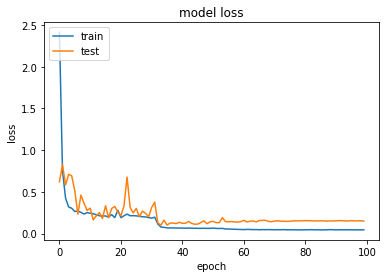

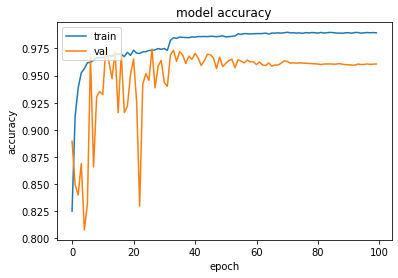

In [2]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen= ImageDataGenerator(
    rescale=1./255.,
)

test_generator = test_datagen.flow_from_directory(
    "/kaggle/input/drowsiness/eyeImagesSeperatedTesting/eyeImagesSeperatedTesting/",
    batch_size=32,
    seed=42,
    class_mode='categorical',
    classes = ['open','closed'],
    shuffle=False,
    target_size=(96, 96)
)

Found 10000 images belonging to 2 classes.


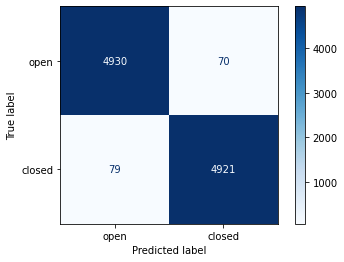

              precision    recall  f1-score   support

        open       0.98      0.99      0.99      5000
      closed       0.99      0.98      0.99      5000

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [4]:
import numpy
from tensorflow import keras
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# model = keras.models.load_model('/kaggle/input/drowsymodel/model1.h5')

test_steps_per_epoch = numpy.math.ceil(test_generator.samples / test_generator.batch_size)

predictions = model.predict(test_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())   

report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)

report2 = metrics.confusion_matrix(test_generator.classes, predicted_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=report2, display_labels=class_labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

print(report)  


In [5]:
model.save('/kaggle/working/model1.h5') 